Ignacio Vellido Expósito

### Ejercicio
En este ejercicio se pide al alumno que desarrolle el fichero thotelling.py para aplicar la transformada a un conjunto de imágenes satélite de la ciudad de Adra. Establecer el error cometido cuando se usa:

    Solamente la primera imagen correspondiente al primer autovalor
    Solamente las dos primeras imágenes correspondientes al primer y segundo autovalor
    ...
    Todos las imágenes.

Mostrar una gráfica que muestre el error cometido cuando se usan las diferentes imágenes obtenidas.


In [1]:
import cv2

# Función para mostrar varias imágenes en una sola ventana
import numpy as np
from matplotlib import pyplot as plt

def plot_vector_img(vim, titles=None, cols=0, suptitle=None, gray=False):
    """ Visualiza varias imágenes a la vez """
    n_images = len(vim)

    if not cols:
        cols = 7 if len(vim) >= 7 else len(vim)

    if titles is None:
        titles = ['' for i in range(1, n_images+1)]

    if suptitle is None:
          suptitle = ''

    fig = plt.figure()
    for n, (image, title) in enumerate(zip(vim, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols, n+1)          
        plt.imshow(image, "gray" if gray else None)        

        a.set_title(title)        
        a.axis('off')

    fig.suptitle(suptitle)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig.subplots_adjust(bottom=0)

    plt.show()

In [40]:
from numpy import linalg as LA

def PCA(vim, shape):
    """ vim: Conjunto de imágenes de formato 1D """
    X = np.array(vim).T.astype("float32")
    m = np.mean(X, axis=0) 
    h = np.ones((X.shape[0],1),dtype='uint8')
    B = X-h*m

    # Covarianza
    C = 1.0/(X.shape[0]-1)*np.dot(B.T,B)

    # Obtener los autovalores y autovectores
    D, V = LA.eig(C)    

    y = np.dot(B,V)

    for i in range(len(vim)):
        vim[i] = np.reshape(y[:,i], shape)

    # Calculando el error como la suma de autovalores
    errors = []
    for i in range(len(D)):
        errors.append(np.sum(D[i:]))

    return vim, errors

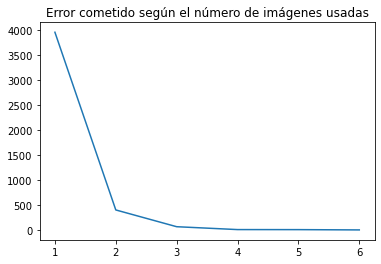

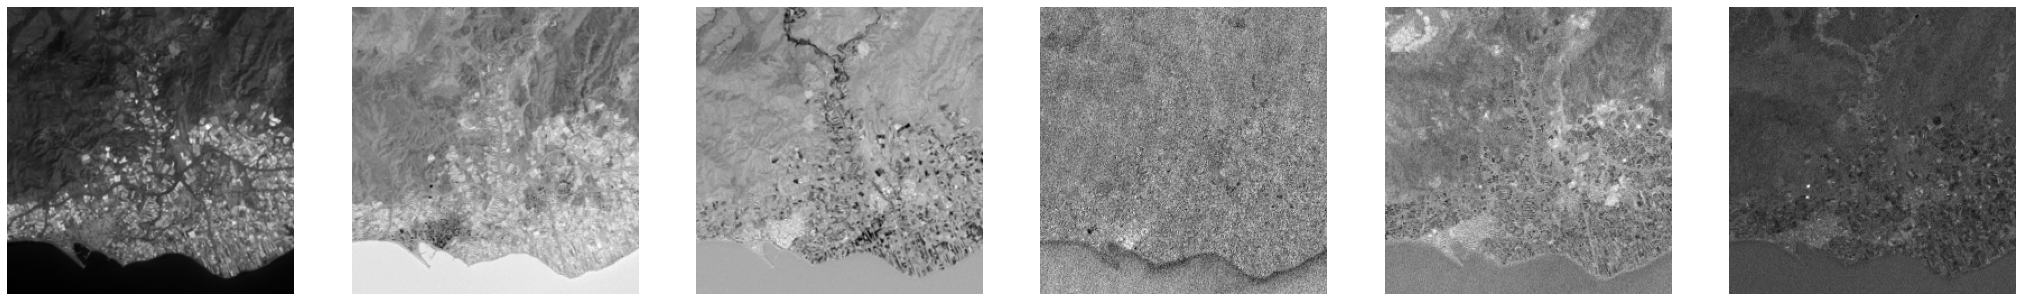

In [41]:
shape = cv2.imread("adra/banda1.tif", 0).shape

names = ["adra/banda1.tif", "adra/banda2.tif", "adra/banda3.tif", "adra/banda4.tif", "adra/banda5.tif", "adra/banda6.tif"]
vim = []
for n in names:
    vim.append(np.ravel(cv2.imread(n, 0)).T)

vim_pca, errors = PCA(vim, shape)

plt.plot(np.arange(1, len(names)+1), errors)
plt.title("Error cometido según el número de imágenes usadas")
plt.show()
plot_vector_img(vim_pca, gray=True)